# Task 1 OIBSIP
# Iris Dataset 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

#### Drop Id column

In [10]:
df.drop(columns=['Id'],inplace=True)

#### Describe dataset

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Remove Null values

In [12]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Remove Duplicate values

In [23]:
df.duplicated().sum()

3

In [24]:
df.drop_duplicates(inplace=True)

There a no null values in the dataset

#### Exploration Data Analysis

<Axes: xlabel='SepalLengthCm'>

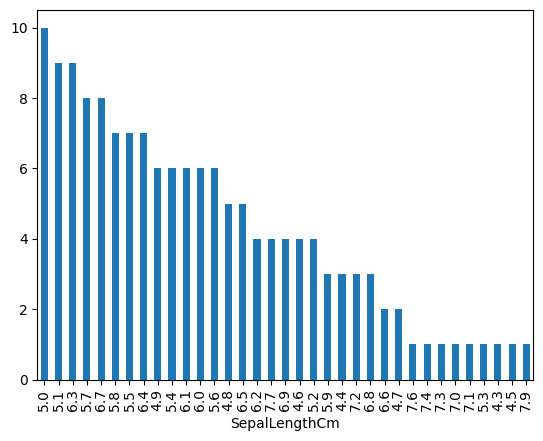

In [14]:
df['SepalLengthCm'].value_counts().plot(kind='bar')

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

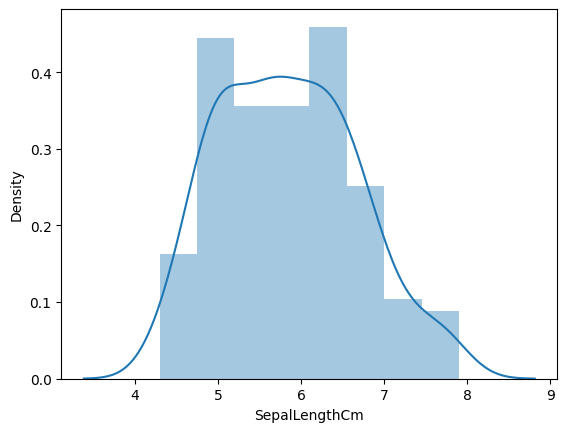

In [20]:
sns.distplot(df['SepalLengthCm'])

We see that graph has no bias this is symmetric

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

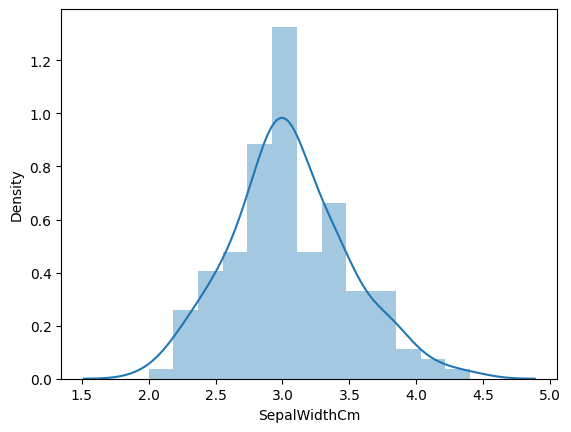

In [25]:
sns.distplot(df['SepalWidthCm'])

This feature is also symmetric not need of perform any operation

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

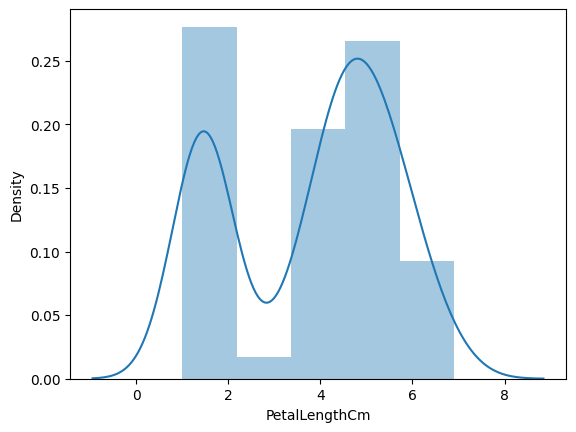

In [26]:
sns.distplot(df['PetalLengthCm'])

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

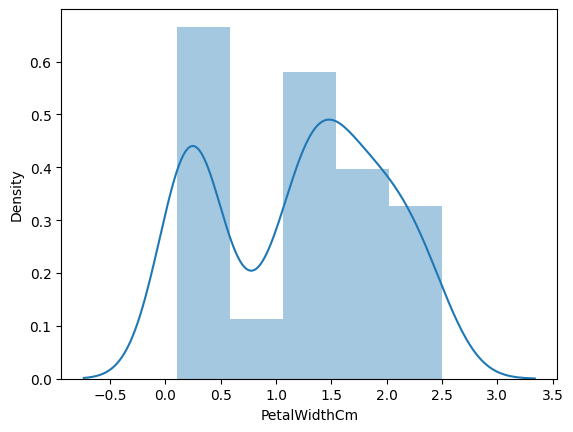

In [27]:
sns.distplot(df['PetalWidthCm'])

#### Pair Plot 

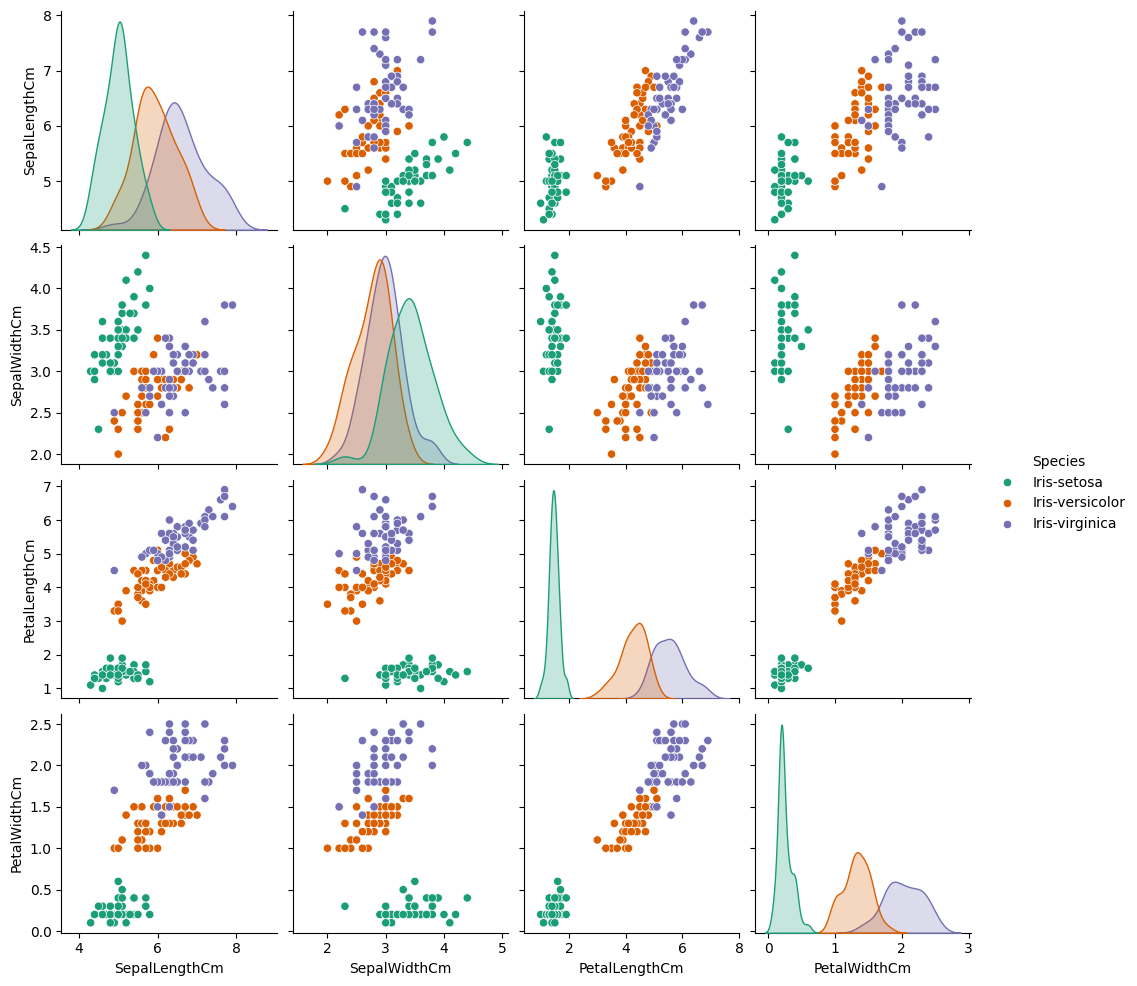

In [28]:
sns.pairplot(df,hue='Species', palette = 'Dark2')
plt.show()

#### Correlation

<Axes: >

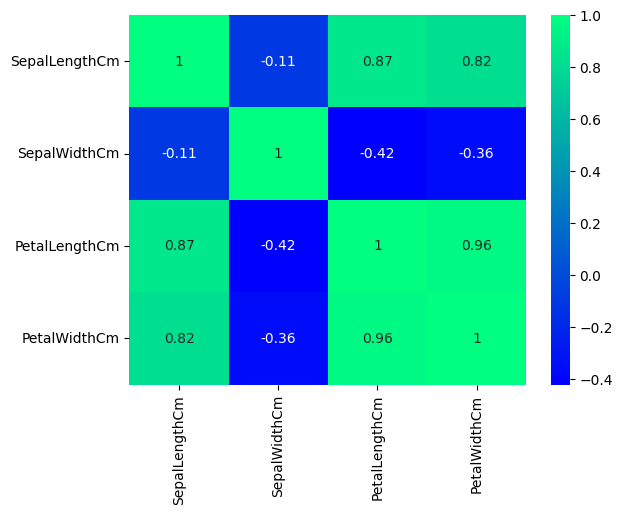

In [31]:
numerical_columns = df.select_dtypes(include=['number'])
sns.heatmap(numerical_columns.corr(),annot=True,cmap='winter')

Here we see that    the correlation every column is correlated to each other there is no null correlations

#### Outliers

Text(0.5, 1.0, 'Box plot')

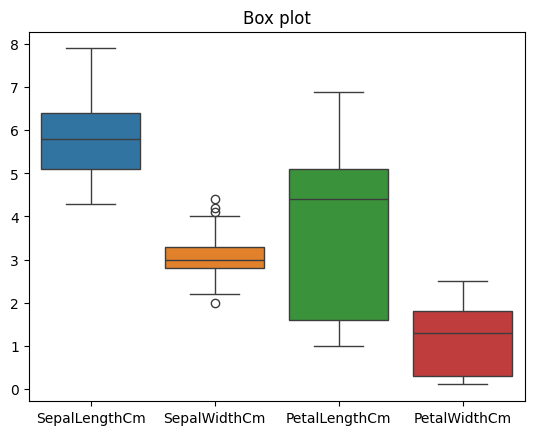

In [32]:
sns.boxplot(data=df)
plt.title('Box plot')

There is no outliers in the dataset

### Now the dataset is ready to implement model

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_curve

In [45]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

##### Split the data set

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

##### models

In [63]:
# Logistic Regression
lg = LogisticRegression()
# fit the dataset in the model
lg.fit(X_train,y_train)

# Predict the response for test dataset 
y_pred = lg.predict(X_test)

# Check the accuracy
print(f"The accuracy of the Logistic Regression is {accuracy_score(y_test,y_pred)*100}%")

The accuracy of the Logistic Regression is 100.0%


In [57]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  8]], dtype=int64)

Here we cleary see that the accuracy of the Logistic Regression is 100% and precision and recall is also 100% as you see in the heatmap

<Axes: >

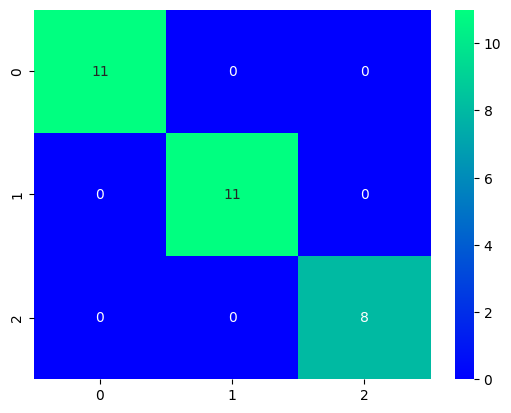

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='winter')